# Friends: Season 1 - 10

#### Libraries used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import re
from modules import friends_library as fr
from modules import apartment_list as apart
from modules import catch_phrase as phrase

## Calling functions to create one merged dataframe

After creating a 'friends_library' that contains all relevant functions, we can easily call the necessary ones in order to create a pipeline that cleans and combines all 10 seasons into one dataframe for further cleaning and/or analysis.

In [2]:
seasons_list= []

for i in range(1,11):
    s = fr.raw_name(i)
    d = pd.read_csv( s , sep='\t')
    fr.rename_col(d)
    fr.scene_col(d)
    fr.scene_fill(d)
    fr.location(d)
    fr.drop_scene(d)
    fr.character(d)
    fr.word_count(d)
    d['season'] = i
    d = fr.final_df(d)
    seasons_list.append(d)

### Concatenating dataframes to create one

In [3]:
df1 = fr.concat_df(seasons_list)

### Amending scene locations for ease of data exploration

In [4]:
apart.amend_location(df1)

### Exploring the dataframe to gather initial insights

In [5]:
df1

,text,location,character,word_count,season
0,Monica: There's nothing to tell! He's just som...,Central Perk,Monica,11,1
1,"Joey: C'mon, you're going out with the guy! Th...",Central Perk,Joey,14,1
2,"Chandler: All right Joey, be nice. So does he...",Central Perk,Chandler,17,1
3,"Phoebe: Wait, does he eat chalk?",Central Perk,Phoebe,5,1
4,"Phoebe: Just, 'cause, I don't want her to go t...",Central Perk,Phoebe,16,1
...,...,...,...,...,...
4427,"Chandler: Oh, it's gonna be okay.",Chandler and Joey's,Chandler,5,10
4428,Rachel: (crying) Do you guys have to go to the...,Chandler and Joey's,Rachel,19,10
4429,Monica: We got some time.,Chandler and Joey's,Monica,4,10
4430,"Rachel: Okay, should we get some coffee?",Chandler and Joey's,Rachel,6,10


In [6]:
df1.to_csv('datasets/df1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/df1.csv'

In [ ]:
df1.describe()

In [ ]:
df1.info()

In [ ]:
pairplot = sns.pairplot(df1, hue='character')

In [ ]:
scatter = sns.lmplot(x="season", y="word_count", hue="character", data=df1)

## Number of lines per character over 10 seasons

In [ ]:
df1.groupby('character').agg({'text': 'count'}).nlargest(10, 'text')

In [ ]:
df1.groupby('character').agg({'text': 'count'}).nlargest(10, 'text').plot.bar(figsize=(12,7))
plt.show()


In [ ]:
df1.groupby(['season', 'character']).count()['word_count'].unstack('character').plot(figsize=(12,7))
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,4))

Ross = df1.character == 'Ross'
Rachel = df1.character == 'Rachel'
Chandler = df1.character == 'Chandler'
Joey = df1.character == 'Joey'
Monica = df1.character == 'Monica'
Phoebe = df1.character == 'Phoebe'

sns.kdeplot(df1['season'][Ross], shade=True)
sns.kdeplot(df1['season'][Rachel], shade=True)
sns.kdeplot(df1['season'][Chandler], shade=True)
sns.kdeplot(df1['season'][Joey], shade=True)
sns.kdeplot(df1['season'][Phoebe], shade=True)
sns.kdeplot(df1['season'][Monica], shade=True)
plt.legend(('Ross', 'Rachel','Chandler', 'Joey', 'Phoebe', 'Monica'))
plt.show()

In [7]:
df_lines = pd.crosstab(df1.season, df1.character)
df_lines

character,Chandler,Joey,Monica,Phoebe,Rachel,Ross
season,,,,,,
1,747,574,816,558,784,902
2,682,645,672,579,652,837
3,797,739,795,729,875,1009
4,814,739,665,639,798,753
5,920,920,873,797,883,856
6,1013,898,887,772,969,879
7,785,868,859,729,1032,779
8,675,893,797,760,1057,964
9,921,864,906,806,904,886


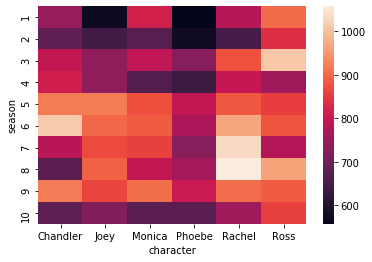

In [8]:
sns.heatmap(df_lines)

We can see that Ross and Rachel lead with close to 9000 individual lines while Phoebe is at the bottom of this list with close to 7000 individual lines over 10 seasons.

## Number of words spoken per character over 10 seasons

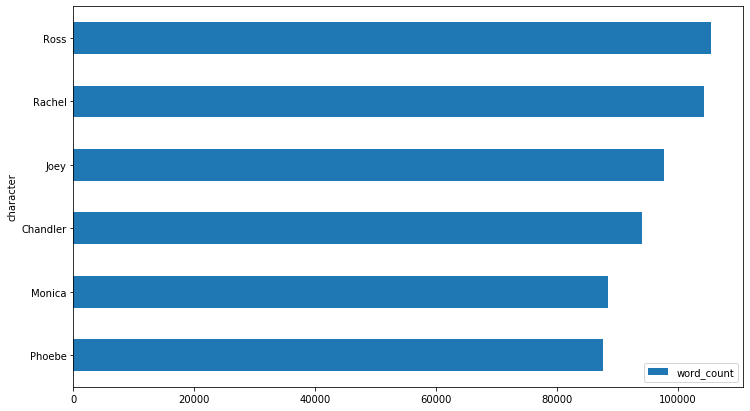

In [9]:
df1.groupby('character').agg({'word_count': 'sum'}).nlargest(10, 'word_count').plot.barh(figsize=(12,7)).invert_yaxis()
plt.show()

In [10]:
df1.groupby('character').agg({'word_count': 'sum'}).nlargest(10, 'word_count')

,word_count
character,
Ross,105473
Rachel,104333
Joey,97635
Chandler,93975
Monica,88460
Phoebe,87634


We can see that the total word count by character is more or less well distirubted across the main 6 characters with Ross and Rachel again leading the pack with close to 100,000 words spoken from individual lines.

### Compraing it over 10 seasons

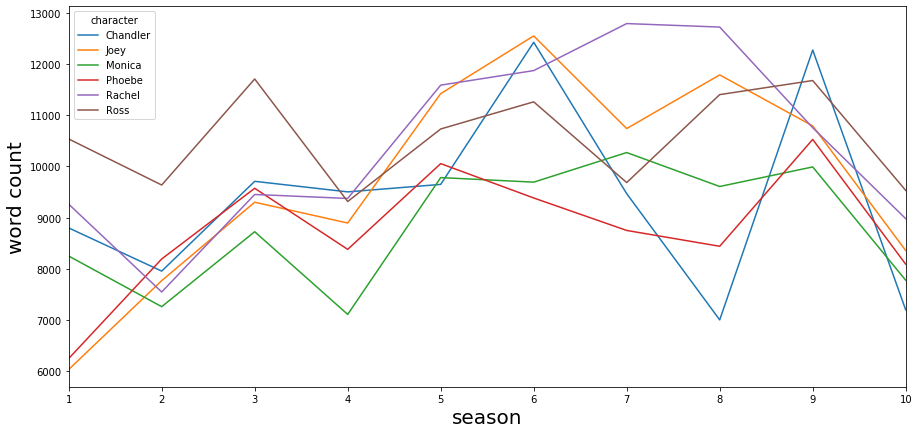

In [11]:
df1.groupby(['season', 'character']).sum()['word_count'].unstack('character').plot(figsize=(15,7))
plt.xlabel('season',fontsize=20)
plt.ylabel('word count',fontsize=20)
plt.show()

### Comparing total words vs. lines per character in order to identify who talks the most

In [12]:
#Sum of words per character
words_char = df1.groupby('character').agg({'word_count': 'sum', 'text':'count'}).nlargest(10, 'word_count')
words_char.rename(columns={'text':'lines'}, inplace=True)

In [13]:
words_char['avg._word_per_line'] = round(words_char.word_count / words_char.lines,2)

In [14]:
words_char

,word_count,lines,avg._word_per_line
character,,,
Ross,105473,8723,12.09
Rachel,104333,8709,11.98
Joey,97635,7863,12.42
Chandler,93975,8036,11.69
Monica,88460,7946,11.13
Phoebe,87634,7045,12.44


In [15]:
df_word_count = pd.pivot_table(df1, values='word_count', index='season',columns=['character'], aggfunc=np.sum)

In [16]:
df_word_count

character,Chandler,Joey,Monica,Phoebe,Rachel,Ross
season,,,,,,
1,8798,6034,8249,6248,9262,10535
2,7955,7769,7261,8192,7548,9636
3,9708,9300,8724,9572,9451,11706
4,9502,8894,7110,8380,9374,9314
5,9648,11420,9781,10054,11586,10730
6,12423,12547,9692,9383,11870,11260
7,9467,10738,10270,8749,12788,9684
8,7003,11786,9607,8440,12720,11401
9,12272,10790,9989,10526,10755,11676


## Character locations over 10 seasons

In [17]:
df_loc = pd.pivot_table(df1, values='text', index='season',columns=['location'], aggfunc=np.count_nonzero)
df_loc

location,Central Perk,Chandler and Joey's,Monica's Apartment,Other,Ross's Apartment,The Hallway
season,,,,,,
1,967,355,1897,984,92,86
2,661,933,1530,562,278,103
3,879,621,1891,1362,84,107
4,690,774,2009,740,79,116
5,953,778,1813,1243,371,91
6,1283,1511,1042,1258,209,115
7,980,1596,919,1321,178,58
8,830,2446,39,1331,308,192
9,868,1655,155,1903,627,79


In [18]:
df_char_loc = pd.crosstab(df1.character, df1.location)
df_char_loc

location,Central Perk,Chandler and Joey's,Monica's Apartment,Other,Ross's Apartment,The Hallway
character,,,,,,
Chandler,1332,2944,1845,1541,187,187
Joey,1389,2872,1444,1818,174,166
Monica,1128,1983,2802,1692,150,191
Phoebe,1813,1057,1807,2096,153,119
Rachel,1473,1763,2223,2478,602,170
Ross,1732,1517,1854,2325,1137,158


In [19]:
df_season_loc = pd.crosstab(df1.season, df1.location)
df_season_loc

location,Central Perk,Chandler and Joey's,Monica's Apartment,Other,Ross's Apartment,The Hallway
season,,,,,,
1,967,355,1897,984,92,86
2,661,933,1530,562,278,103
3,879,621,1891,1362,84,107
4,690,774,2009,740,79,116
5,953,778,1813,1243,371,91
6,1283,1511,1042,1258,209,115
7,980,1596,919,1321,178,58
8,830,2446,39,1331,308,192
9,868,1655,155,1903,627,79


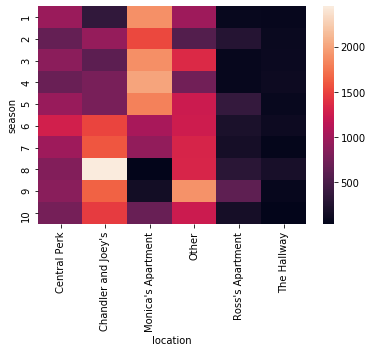

In [20]:
ax = sns.heatmap(df_season_loc)


## Calling functions again to add 'Other' to the characters

In [21]:
seasons_list= []

for i in range(1,11):
    s = fr.raw_name(i)
    d = pd.read_csv( s , sep='\t')
    fr.rename_col(d)
    fr.scene_col(d)
    fr.scene_fill(d)
    fr.location(d)
    fr.drop_scene(d)
    fr.character(d)
    fr.word_count(d)
    d['season'] = i
    seasons_list.append(d)

In [22]:
df1 = fr.concat_df(seasons_list)

In [23]:
apart.amend_location(df1)

In [24]:
df1.head()

,text,location,character,word_count,season
3,"[Scene: Central Perk, Chandler, Joey, Phoebe, ...",Central Perk,Other,9,1
4,Monica: There's nothing to tell! He's just som...,Central Perk,Monica,11,1
5,"Joey: C'mon, you're going out with the guy! Th...",Central Perk,Joey,14,1
6,"Chandler: All right Joey, be nice. So does he...",Central Perk,Chandler,17,1
7,"Phoebe: Wait, does he eat chalk?",Central Perk,Phoebe,5,1


In [25]:
phrase.catch_phrase(df1)

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [26]:
df1.catch_phrase.value_counts()

                       66170
OH MY GOD!               975
Dinosaurs!                56
How you doin!             24
Smelly Cat!               24
Pizza!                    22
We were on a break!       17
Name: catch_phrase, dtype: int64